In [21]:
# Create random data

import numpy as np
import pandas as pd
from plotnine import * 
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

n_samples = 2000
test_size = 0.1
# Clean data
X_clean, y_clean = make_moons(n_samples=n_samples, noise=0.10, random_state=42)
X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean, y_clean, test_size = test_size, random_state=42)

# Noisy data
X_noisy, y_noisy = make_moons(n_samples=n_samples, noise=0.30, random_state=42)
X_noisy_train, X_noisy_test, y_noisy_train, y_noisy_test = train_test_split(X_noisy, y_noisy, test_size = test_size, random_state=12)

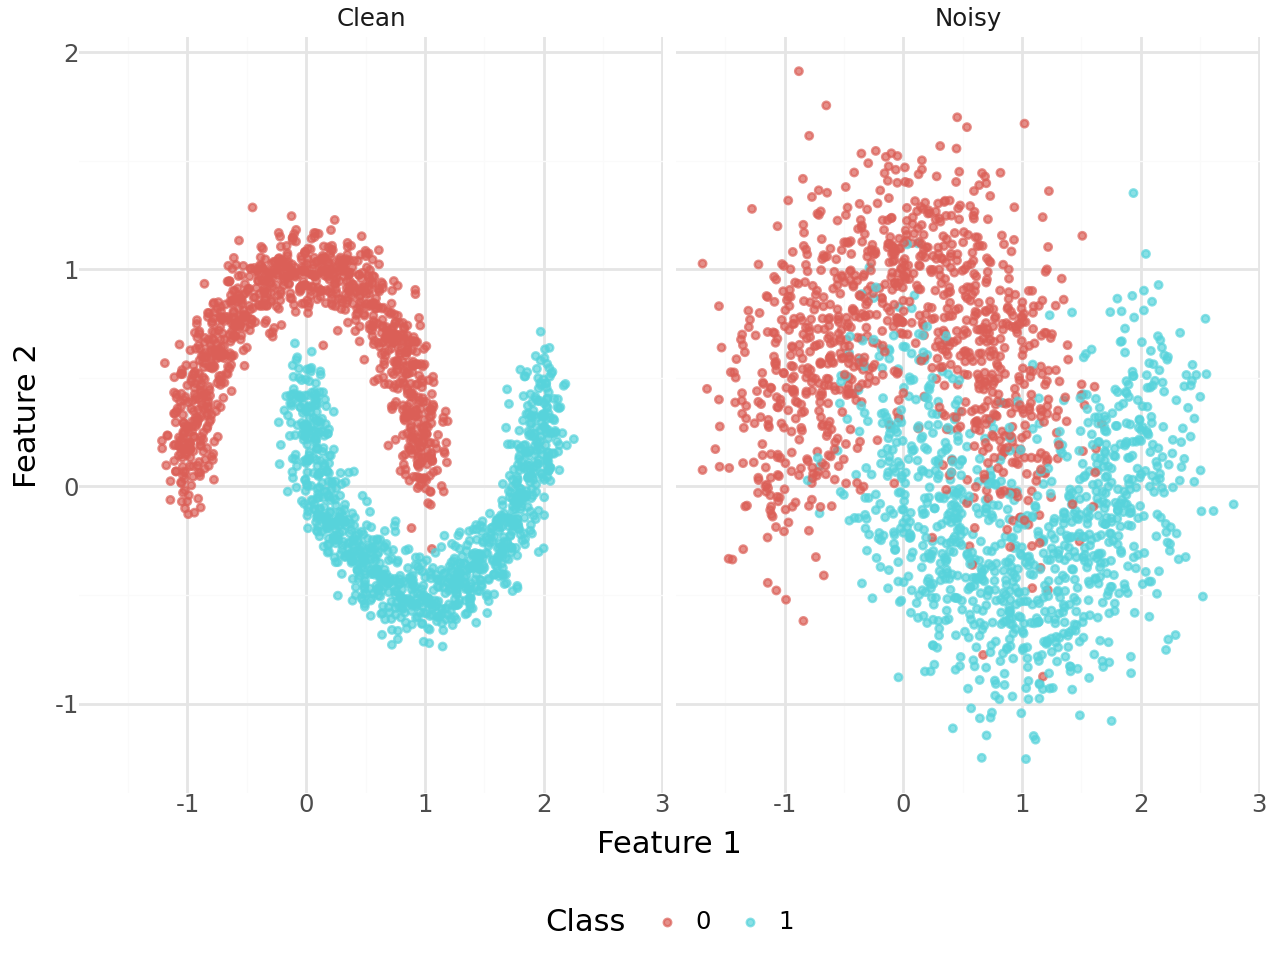

In [22]:
## Plot the data

# Create a DataFrame for the data
df_clean = pd.DataFrame({
    'Feature1': X_clean[:, 0],
    'Feature2': X_clean[:, 1],
    'Class': y_clean,
    'quality': 'Clean'
})

df_noisy = pd.DataFrame({
    'Feature1': X_noisy[:, 0],
    'Feature2': X_noisy[:, 1],
    'Class': y_noisy,
    'quality': 'Noisy'
})

df = pd.concat([df_clean, df_noisy])

df["Class"] = pd.Categorical(df['Class'], categories=[0, 1], ordered=True)
df["quality"] = pd.Categorical(df['quality'], categories=['Clean', 'Noisy'], ordered=True)

# Map the class labels to shape types (0 -> triangle, 1 -> circle)
df['Shape'] = np.where(df['Class'] == 0, 'triangle-up', 'circle')

# Create the plot
p = (ggplot(df)
     + geom_point(aes(x='Feature1', y='Feature2', color='Class'), size=1, alpha=0.7)
     + labs(x='Feature 1', y='Feature 2')
     + theme_minimal()
     + theme(legend_position = 'bottom')
     + scale_color_hue()
     + facet_wrap("quality")
)

# Display the plot
p

In [23]:
## Train models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

n_estimators = 500

# Train a random forest algorithm on clean data
rf_clf_clean = RandomForestClassifier(n_estimators=n_estimators, max_samples=100, n_jobs=-1, random_state=42)
rf_clf_clean.fit(X_clean_train, y_clean_train)

# Train a gradient boosting algorithm on clean data
gb_clf_clean = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
gb_clf_clean.fit(X_clean_train, y_clean_train)

# Train a random forest algorithm on noisy data
rf_clf_noisy = RandomForestClassifier(n_estimators=n_estimators, max_samples=100, n_jobs=-1, random_state=42)
rf_clf_noisy.fit(X_noisy_train, y_noisy_train)

# Train a gradient boosting algorithm on noisy data
gb_clf_noisy = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
gb_clf_noisy.fit(X_noisy_train, y_noisy_train)

GradientBoostingClassifier(n_estimators=500, random_state=42)

In [24]:
# extra code – this cell generates and saves Figure 7–5

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='summer')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#08785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

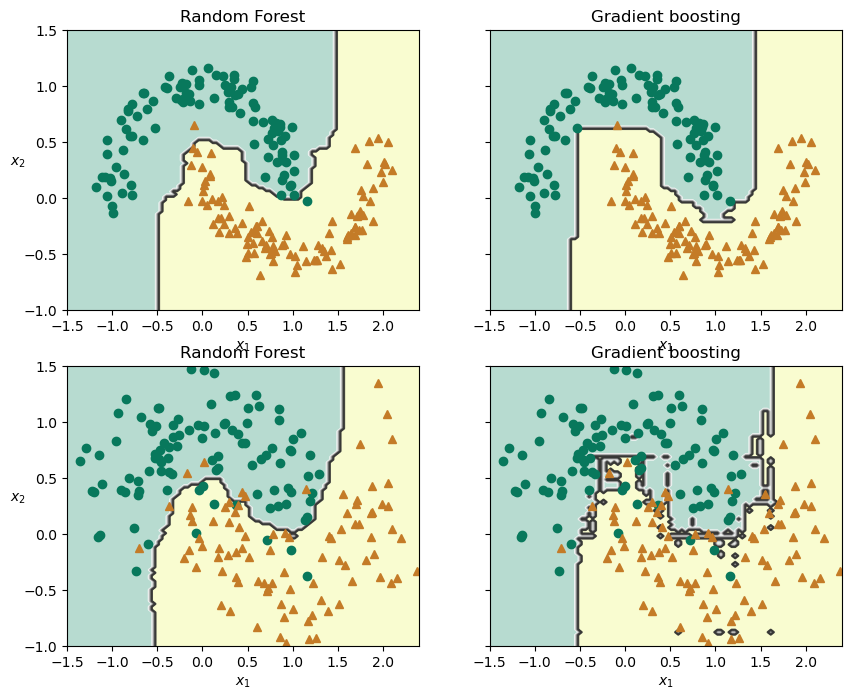

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharey=True)
plt.sca(axes[0, 0])
plot_decision_boundary(rf_clf_clean, X_clean_test, y_clean_test)
plt.title("Random Forest")
plt.sca(axes[0, 1])
plot_decision_boundary(gb_clf_clean, X_clean_test, y_clean_test)
plt.title("Gradient boosting")
plt.ylabel("")
plt.sca(axes[1, 0])
plot_decision_boundary(rf_clf_noisy, X_noisy_test, y_noisy_test)
plt.title("Random Forest")
plt.sca(axes[1, 1])
plot_decision_boundary(gb_clf_noisy, X_noisy_test, y_noisy_test)
plt.title("Gradient boosting")
plt.ylabel("")
plt.show()